In [26]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape
# Each Label is between 0-9
# train_labels
# test_images.shape

(60000, 28, 28)

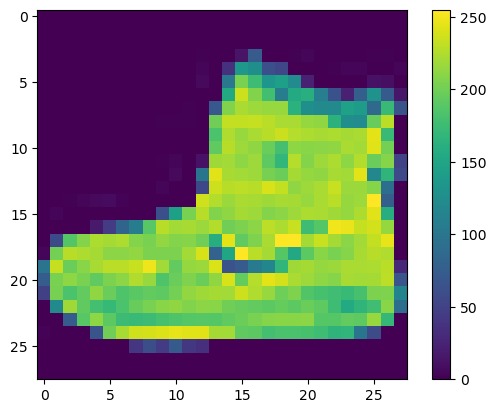

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

In [16]:
#standardizing the data: scaling the images from 0–1 & feeding it to NN:
train_images = train_images / 255.0
test_images = test_images / 255.0

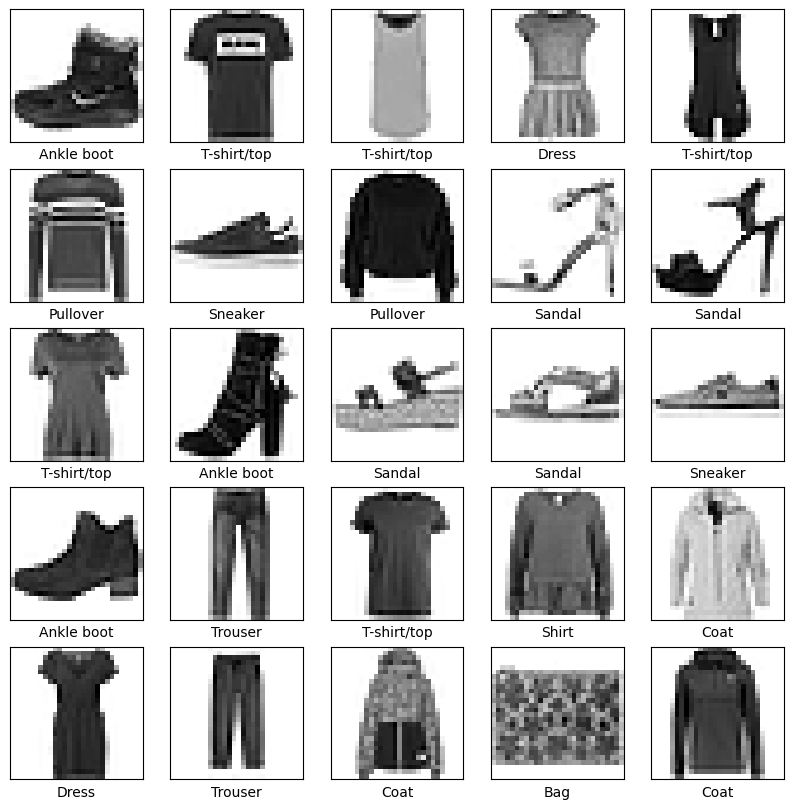

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Setting up the model (layers, activation, etc.):
Note that 'keras.layers.Flatten' reduces the dimensionality of a matrix into a vector (according to TF documentation, it converts the multi-dimensional arrays into flattened one-dimensional arrays or single-dimensional arrays).

In [55]:
#relu activation in first dense, softmax activation in second (for probability distributions of 10 possible outcomes):
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(train_images.shape[1], train_images.shape[2])), #input shapes are 28x28. 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [56]:
#can use ADAM or SGD optimizer!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
#training the model:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 816us/step - loss: 0.5080 - accuracy: 0.8201
Epoch 2/20
1875/1875 [==============================] - 2s 811us/step - loss: 0.3781 - accuracy: 0.8630
Epoch 3/20
1875/1875 [==============================] - 2s 811us/step - loss: 0.3416 - accuracy: 0.8754
Epoch 4/20
1875/1875 [==============================] - 2s 805us/step - loss: 0.3204 - accuracy: 0.8828
Epoch 5/20
1875/1875 [==============================] - 2s 803us/step - loss: 0.3056 - accuracy: 0.8877
Epoch 6/20
1875/1875 [==============================] - 2s 814us/step - loss: 0.2909 - accuracy: 0.8924
Epoch 7/20
1875/1875 [==============================] - 2s 817us/step - loss: 0.2786 - accuracy: 0.8957
Epoch 8/20
1875/1875 [==============================] - 2s 805us/step - loss: 0.2706 - accuracy: 0.8994
Epoch 9/20
1875/1875 [==============================] - 2s 867us/step - loss: 0.2589 - accuracy: 0.9032
Epoch 10/20
1875/1875 [==============================] - 2s 810u

In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 559us/step - loss: 0.3289 - accuracy: 0.8918
Test accuracy: 0.8917999863624573


In [59]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 510us/step


array([2.2119564e-09, 1.7248787e-10, 2.1979446e-08, 4.1632557e-12,
       2.2631777e-08, 4.9145878e-05, 4.9612682e-11, 3.1713645e-03,
       4.7084652e-11, 9.9677950e-01], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

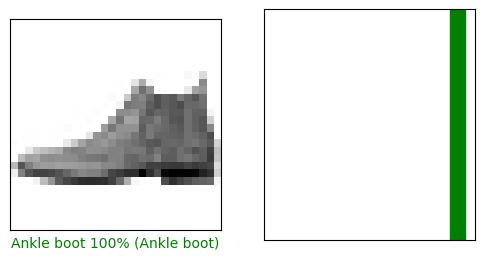

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

------------------------------------------------------------------------------------------------------------------------------

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

/Users/elyhahami/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 255s 22us/step


In [10]:
import numpy as np
import matplotlib.pyplot as plt

------------------------------------------------------------------------------------------------------------------------------

In [15]:
(ely_x_train, ely_y_train), (ely_x_test, ely_y_test) = mnist.load_data()

In [24]:
ely_x_train.shape

(60000, 28, 28)

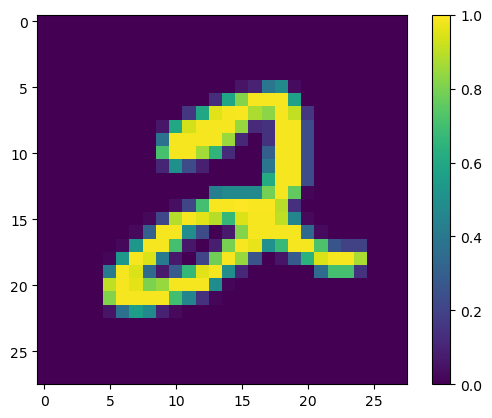

In [57]:
#visualizing a sample image:
plt.figure()
plt.imshow(ely_x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
#standardizing the data: scaling the images from 0–1 & feeding it to NN:
ely_x_train = ely_x_train / 255.0
ely_x_test = ely_x_test / 255.0

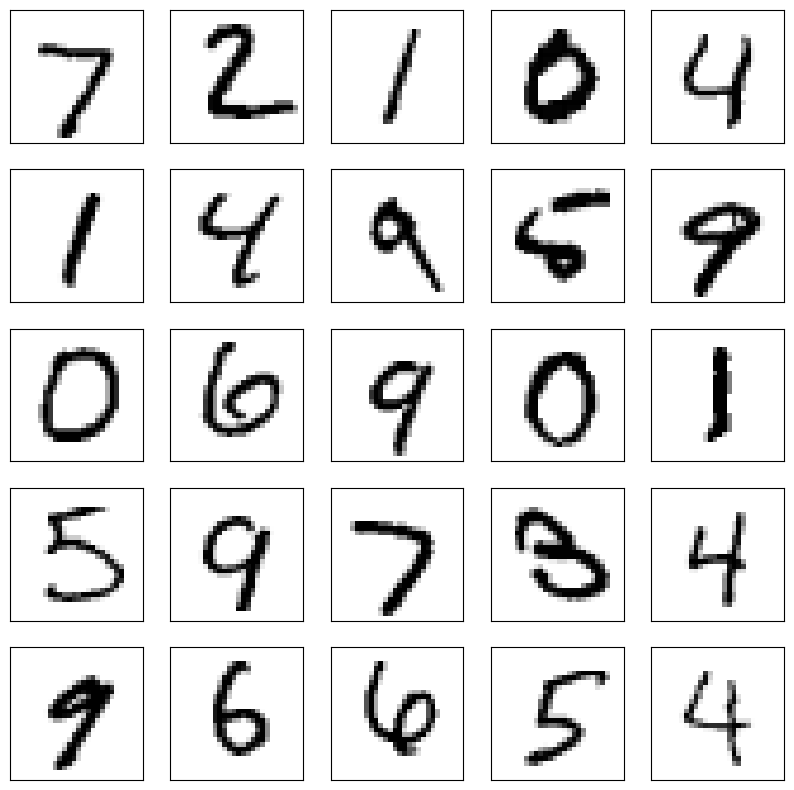

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ely_x_test[i], cmap=plt.cm.binary)
plt.show()

In [27]:
#relu activation in first dense, softmax activation in second (for probability distributions of 10 possible outcomes):
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(ely_x_train.shape[1], ely_x_train.shape[2])), #input shapes are 28x28. 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [68]:
from tensorflow.keras.optimizers import SGD ##new SGD right here!!

In [74]:
#can use ADAM or SGD optimizer!
model.compile(optimizer=SGD(learning_rate = 0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.fit(ely_x_train, ely_y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 781us/step - loss: 1.2316e-04 - accuracy: 1.0000
Epoch 2/20
1875/1875 [==============================] - 1s 779us/step - loss: 1.2159e-04 - accuracy: 1.0000
Epoch 3/20
1875/1875 [==============================] - 1s 762us/step - loss: 1.2052e-04 - accuracy: 1.0000
Epoch 4/20
1875/1875 [==============================] - 1s 764us/step - loss: 1.1920e-04 - accuracy: 1.0000
Epoch 5/20
1875/1875 [==============================] - 1s 762us/step - loss: 1.1811e-04 - accuracy: 1.0000
Epoch 6/20
1875/1875 [==============================] - 2s 815us/step - loss: 1.1693e-04 - accuracy: 1.0000
Epoch 7/20
1875/1875 [==============================] - 1s 766us/step - loss: 1.1585e-04 - accuracy: 1.0000
Epoch 8/20
1875/1875 [==============================] - 1s 762us/step - loss: 1.1475e-04 - accuracy: 1.0000
Epoch 9/20
1875/1875 [==============================] - 1s 765us/step - loss: 1.1371e-04 - accuracy: 1.0000
Epoch 10/20
1875/1875 [=====

In [76]:
test_loss, test_acc = model.evaluate(ely_x_test, ely_y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 560us/step - loss: 0.0991 - accuracy: 0.9820
Test accuracy: 0.9819999933242798


In [77]:
predictions = model.predict(ely_x_test)
predictions[257]
# np.argmax(predictions[257])

313/313 [==============================] - 0s 511us/step


array([5.8016183e-09, 8.1889557e-05, 1.7163494e-07, 8.5452496e-07,
       1.9879567e-09, 4.2346018e-12, 4.6693778e-08, 5.2894859e-11,
       9.9991703e-01, 3.1421203e-16], dtype=float32)

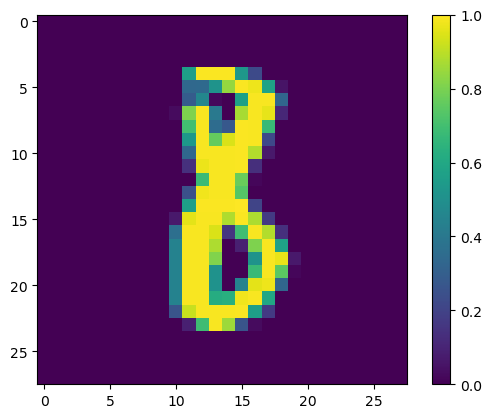

In [78]:
plt.figure()
plt.imshow(ely_x_test[257])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.